<a href="https://colab.research.google.com/github/karaage0703/object_detection_tools/blob/master/colab_tutorials/inference_from_saved_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection API tutorial sample

inference using saved model

Import library

In [1]:
import tensorflow as tf
import cv2
import sys
import numpy as np
import time

In [2]:
tf.__version__

'2.2.0'

Download image

In [3]:
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image1.jpg

--2020-07-12 13:18:01--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129862 (127K) [image/jpeg]
Saving to: ‘image1.jpg’

image1.jpg          100%[===================>] 126.82K  --.-KB/s    in 0.04s   

2020-07-12 13:18:01 (3.08 MB/s) - ‘image1.jpg’ saved [129862/129862]



Load image

In [4]:
img = cv2.imread('image1.jpg')

Plot image

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

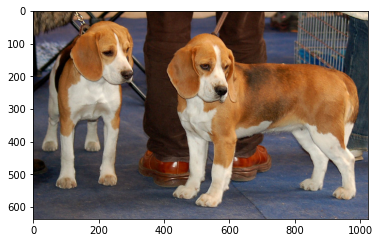

In [6]:
img_rgb = img[:,:,::-1]
plt.imshow(img_rgb)

Preprocessing image

In [7]:
img_bgr = cv2.resize(img, (300, 300))

# convert bgr to rgb
image_np = img_bgr[:,:,::-1]
image_np_expanded = np.expand_dims(image_np, axis=0)

Convert ndarray to tensor

In [8]:
tensor = tf.convert_to_tensor(image_np_expanded)

Download saved model

In [11]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_coco17_tpu-8.tar.gz
!tar xvzf centernet_hg104_512x512_coco17_tpu-8.tar.gz
!rm centernet_hg104_512x512_coco17_tpu-8.tar.gz

--2020-07-12 13:21:43--  http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.211.128, 2607:f8b0:400c:c10::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.211.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1426100886 (1.3G) [application/x-tar]
Saving to: ‘centernet_hg104_512x512_coco17_tpu-8.tar.gz’

centernet_hg104_512 100%[===================>]   1.33G   170MB/s    in 8.4s    

2020-07-12 13:21:51 (162 MB/s) - ‘centernet_hg104_512x512_coco17_tpu-8.tar.gz’ saved [1426100886/1426100886]

centernet_hg104_512x512_coco17_tpu-8/
centernet_hg104_512x512_coco17_tpu-8/checkpoint/
centernet_hg104_512x512_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
centernet_hg104_512x512_coco17_tpu-8/checkpoint/checkpoint
centernet_hg104_512x512_coco17_tpu-8/checkpoint/ckpt-0.index
centernet_hg104_512x512_coco17_tpu-8/p

Check saved model using saved_model_cli

reference: https://qiita.com/parkkiung123/items/13adb482860f356f97f3

In [38]:
!saved_model_cli show --dir ./centernet_hg104_512x512_coco17_tpu-8/saved_model/ --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_tensor'] tensor_info:
        dtype: DT_UINT8
        shape: (1, -1, -1, 3)
        name: serving_default_input_tensor:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['detection_boxes'] tensor_info:
        dtype: DT_FLOAT
        shape: (1, 100, 4)
        name: StatefulPartitionedCall:0
    outputs['detection_classes'] tensor_info:
        dtype: DT_FLOAT
        shape: (1, 100)
        name: StatefulPartitionedCall:1
    outputs['detection

Load saved model

In [13]:
saved_model_path='./centernet_hg104_512x512_coco17_tpu-8/saved_model/'
DEFAULT_FUNCTION_KEY = "serving_default"
loaded = tf.saved_model.load(saved_model_path)
inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]

Inference

In [14]:
output_dict = inference_func(tensor)

In [15]:
output_dict

{'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[3.83382142e-02, 2.75575817e-02, 8.60454202e-01, 3.06501865e-01],
         [9.61592197e-02, 3.75825673e-01, 9.44020748e-01, 9.76771355e-01],
         [9.52482224e-04, 3.33042204e-01, 8.66347790e-01, 7.37101614e-01],
         [0.00000000e+00, 3.32235992e-01, 9.47475195e-01, 7.37756193e-01],
         [9.73277688e-02, 3.87261242e-01, 9.42922890e-01, 9.79435205e-01],
         [6.43386722e-01, 5.89358270e-01, 8.20649385e-01, 7.12667286e-01],
         [3.43903899e-03, 3.42936277e-01, 9.53179598e-01, 8.20793867e-01],
         [6.16908073e-04, 6.99599445e-01, 1.02214709e-01, 7.93557823e-01],
         [1.75550580e-04, 5.38942456e-01, 2.55824924e-01, 7.03066111e-01],
         [0.00000000e+00, 1.96456909e-03, 8.53347540e-01, 7.09087253e-01],
         [4.04635072e-03, 7.75892019e-01, 9.23782229e-01, 9.96612668e-01],
         [0.00000000e+00, 2.89690495e-03, 6.55479729e-01, 7.06680536e-01],
         [1.15304291e-02, 3

In [18]:
output_dict['detection_classes']

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[18., 18.,  1.,  1., 21., 31., 18.,  1.,  1.,  1.,  1.,  1., 18.,
         1.,  1., 18.,  1.,  1.,  1., 27.,  1.,  1.,  1.,  1., 18., 18.,
         1., 21., 62., 21.,  1.,  1., 64.,  1.,  1.,  1., 58.,  1.,  1.,
         1.,  1.,  1.,  1.,  1., 31., 40., 15., 31.,  1.,  3.,  1., 60.,
         1., 54., 17., 18.,  1.,  1., 27.,  1.,  1., 31.,  1., 62.,  1.,
         1., 31.,  1., 20., 17., 33., 62., 27., 62.,  1., 62., 31.,  1.,
        15., 59., 18.,  1.,  1.,  1., 18., 62.,  1., 18., 21., 62.,  1.,
        19., 62.,  1., 19., 15.,  4., 19.,  1., 19.]], dtype=float32)>

In [19]:
output_dict['detection_classes'].shape

TensorShape([1, 100])

In [20]:
output_dict['detection_classes'][0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

In [21]:
output_dict['detection_classes'][0][99]

<tf.Tensor: shape=(), dtype=float32, numpy=19.0>

In [23]:
output_dict['detection_boxes'][0][0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.03833821, 0.02755758, 0.8604542 , 0.30650187], dtype=float32)>

In [24]:
output_dict['detection_boxes'][0][99]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.00336763, 0.31508726, 0.9443836 , 0.9749003 ], dtype=float32)>

In [25]:
output_dict['detection_scores'].shape

TensorShape([1, 100])

In [26]:
output_dict['detection_scores'][0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.8538276>

In [27]:
output_dict['detection_scores'][0][99]

<tf.Tensor: shape=(), dtype=float32, numpy=0.024436831>

In [28]:
output_dict['num_detections']

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>

In [29]:
output_dict['num_detections'][0]

<tf.Tensor: shape=(), dtype=float32, numpy=100.0>

Convert from tensor to ndarray

In [30]:
output_dict['num_detections'] = int(output_dict['num_detections'][0])
output_dict['detection_classes'] = output_dict['detection_classes'][0].numpy()
output_dict['detection_boxes'] = output_dict['detection_boxes'][0].numpy()
output_dict['detection_scores'] = output_dict['detection_scores'][0].numpy()

Draw bounding box

In [33]:
for i in range(output_dict['num_detections']):
    detection_score = output_dict['detection_scores'][i]

    if detection_score > 0.5:
        h, w, c = img.shape
        box = output_dict['detection_boxes'][i] * np.array([h, w,  h, w])
        box = box.astype(np.int)

        # Draw bounding box
        cv2.rectangle(img, \
            (box[1], box[0]), (box[3], box[2]), (255, 255, 255), 3)

Plot result

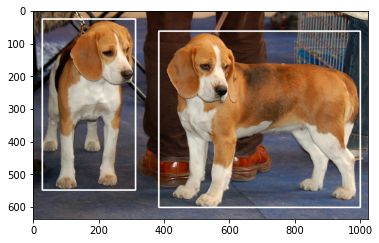

In [34]:
img_rgb = img[:,:,::-1]
plt.imshow(img_rgb)